Using bayesian ML model we can retrieve a whole array of inferrential solutions rather than a point estimate or confidence interval

Terminology: 

1. Priors - Priors are provided as base knowledge about outcome

2. Likelihood - The probability of falling under a specific category or class.

3. Posterior - Result of Model, range or distriution of possible values OR Conditional probability distribution representing what parameters are likely after observing the data object.

In [2]:
#numerical computation package for Python
import numpy             as np

#data management package for Python
import pandas            as pd

#Data visualization package for Python
import arviz             as az
import matplotlib.pyplot as plt#you can use seaborn via : import seaborn as sn
#Bayesian package for Python
import pymc3             as pm

#to simplify math formula management
import aesara

# Set random seed and plotting details

In [3]:
# making seed = 0 makes the results replicable i.e.it reduces the entropy

seed = 0
rand_generator = np.random.default_rng(seed)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

# Generating data and population regression equation

In [4]:
size = 200 # We are generating 200 sample data points

x = np.linspace(0, 1, size) # x is in between 0 to 1 following uniform distribution with 200 points having linear space
xb = 1 + 2 * x # predictable part of y using x
y = 1 + 2 * x + np.random.normal(scale = 1, size=size) # y = predictable part + guassian noise

data = pd.DataFrame(dict(x=x, y=y))
data

,x,y
0,0.000000,2.621325
1,0.005025,1.222435
2,0.010050,1.844151
3,0.015075,-0.130300
4,0.020101,2.122027
...,...,...
195,0.979899,3.135036
196,0.984925,4.433769
197,0.989950,3.564944
198,0.994975,2.736217


Plotting Data and Population regression equation

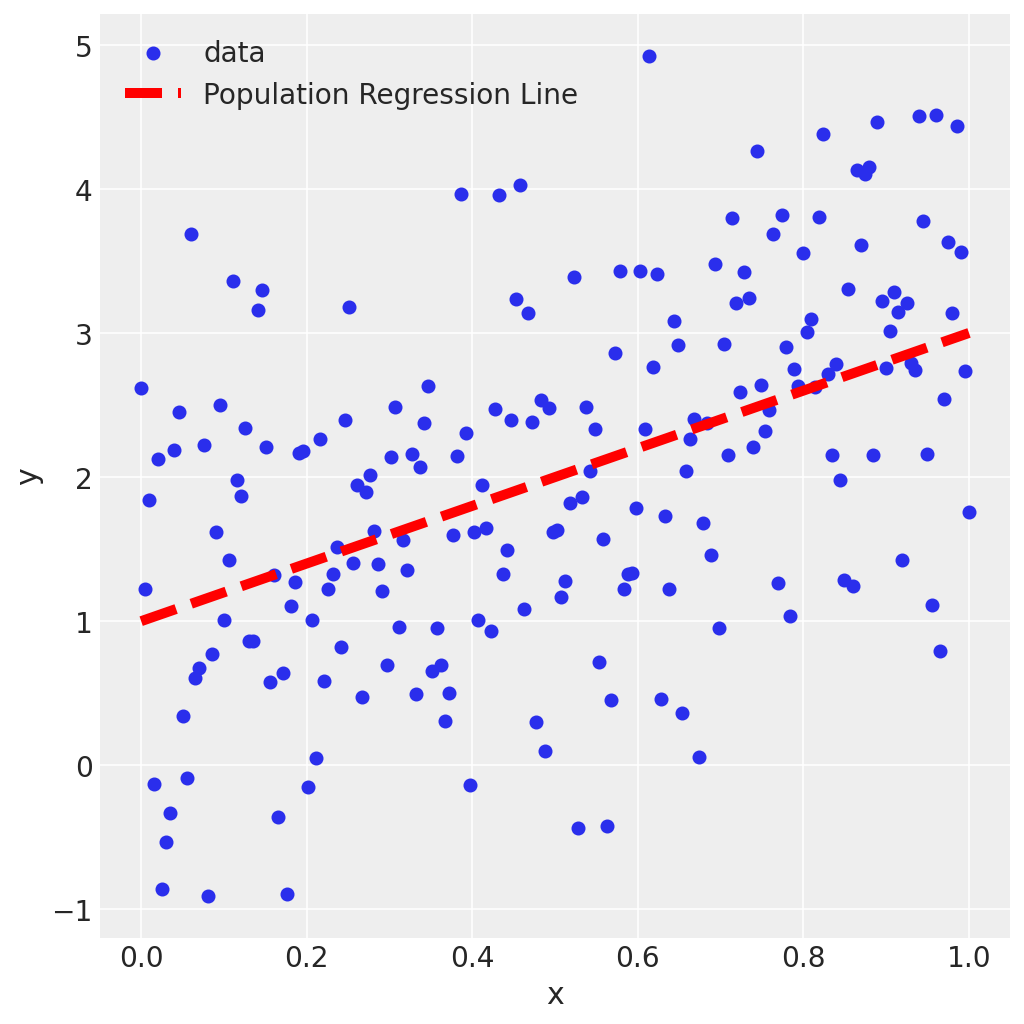

In [8]:
figure = plt.figure(figsize=(7, 7))

plt.scatter(x, y, label="data")
plt.plot(x, xb, label="Population Regression Line", c="red",lw=5, linestyle="dashed")

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

# Baseline : Frequentist OLS

In [10]:
import statsmodels.api as sm

X = data['x']
X = sm.add_constant(X) # We add 1's as constants to independant variables
Y = data['y']

reg = sm.OLS(Y, X)
result = reg.fit()

print(result.summary())

Y_pred = result.predict()
Y_pred.shape = (200,1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     66.35
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           4.18e-14
Time:                        18:12:14   Log-Likelihood:                -296.54
No. Observations:                 200   AIC:                             597.1
Df Residuals:                     198   BIC:                             603.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9445      0.151      6.258      0.0

# Frequentist OLS Plotting

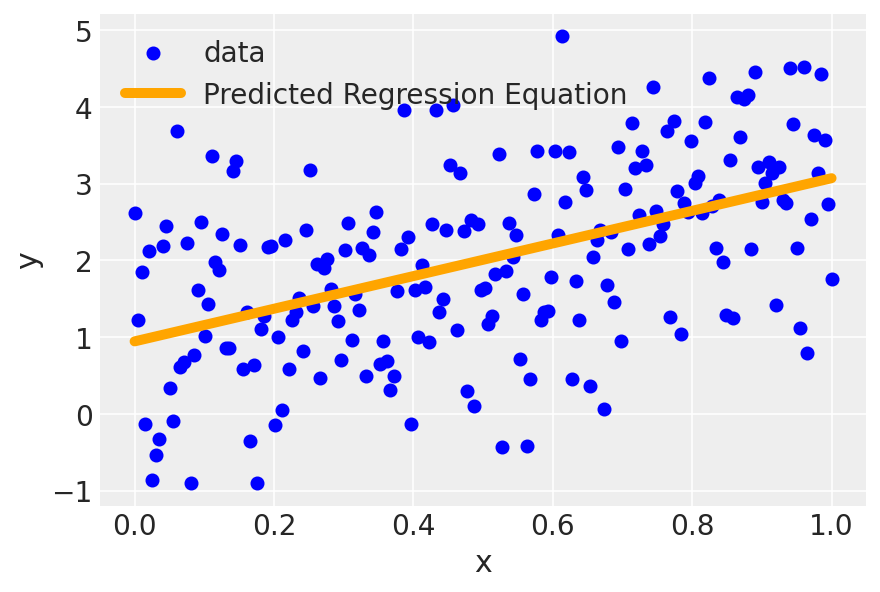

In [11]:
figure1 = plt.figure()

plt.scatter(X['x'], Y, label='data', color='blue')
plt.plot(X['x'], Y_pred, label='Predicted Regression Equation', color='orange', linewidth=5.0)

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

# Bayesian Regression

Define prior, likelihood and calculate posterior

In [13]:
with pm.Model() as model:
    pm.glm.GLM.from_formula("y ~ x", data)
    trace = pm.sample(10000, cores=16)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [sd, x, Intercept]


Sampling 16 chains for 1_000 tune and 10_000 draw iterations (16_000 + 160_000 draws total) took 152 seconds.
The acceptance probability does not match the target. It is 0.8846204073289724, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8917208755323988, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8843550233217192, but should be close to 0.8. Try to increase the number of tuning steps.


Plotting

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

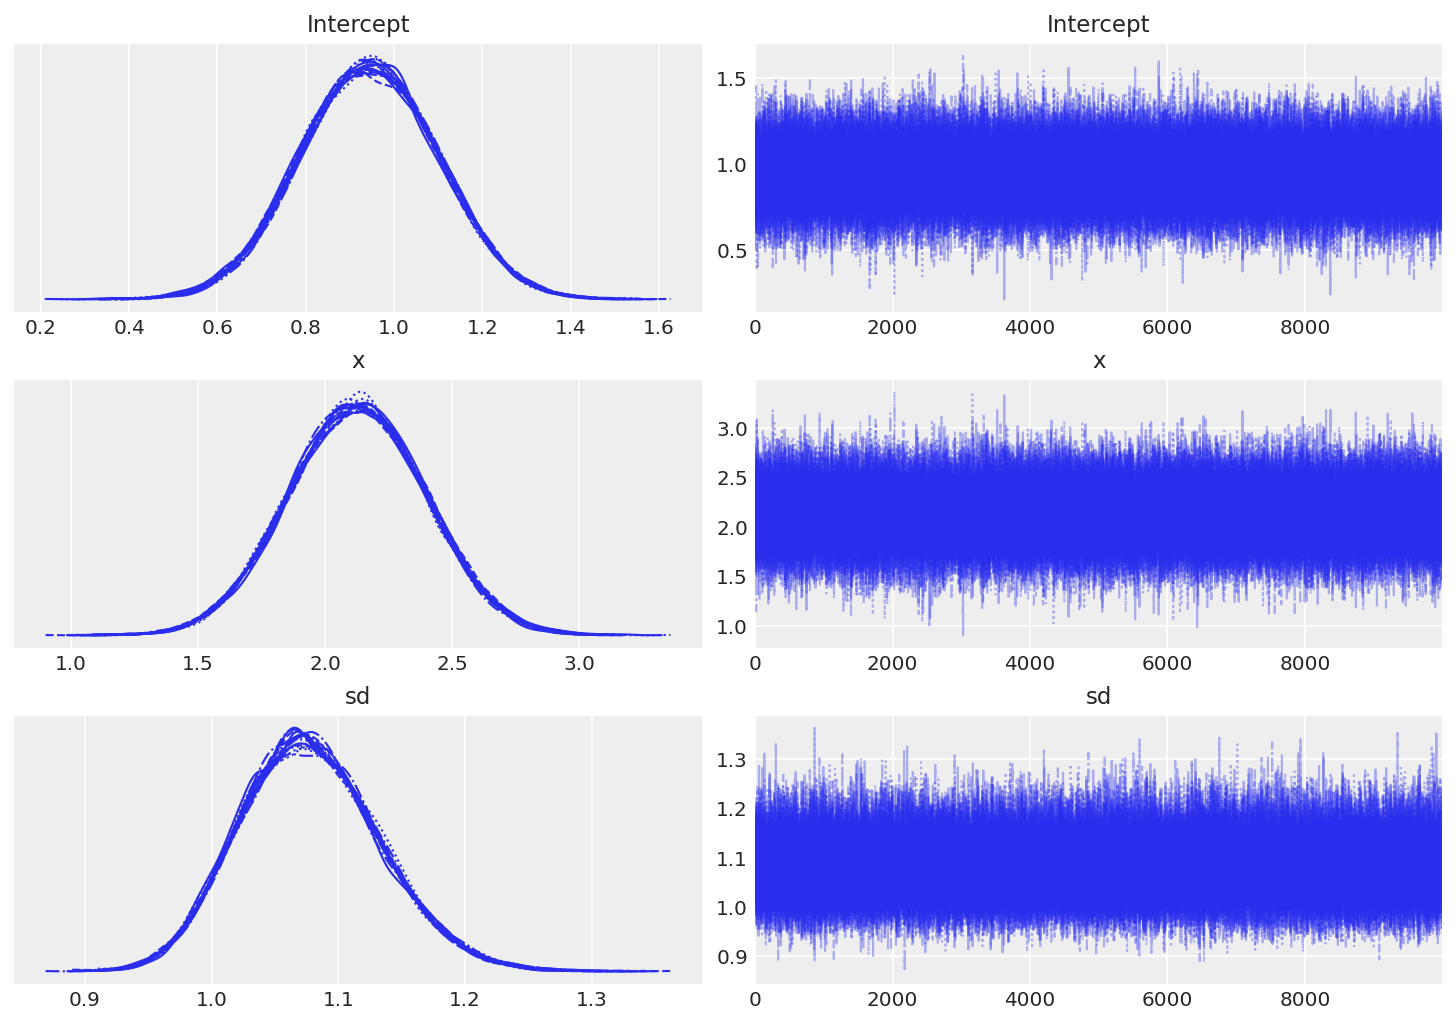

In [14]:
az.plot_trace(trace, figsize=(10,7))

Bayesian Regression Plot

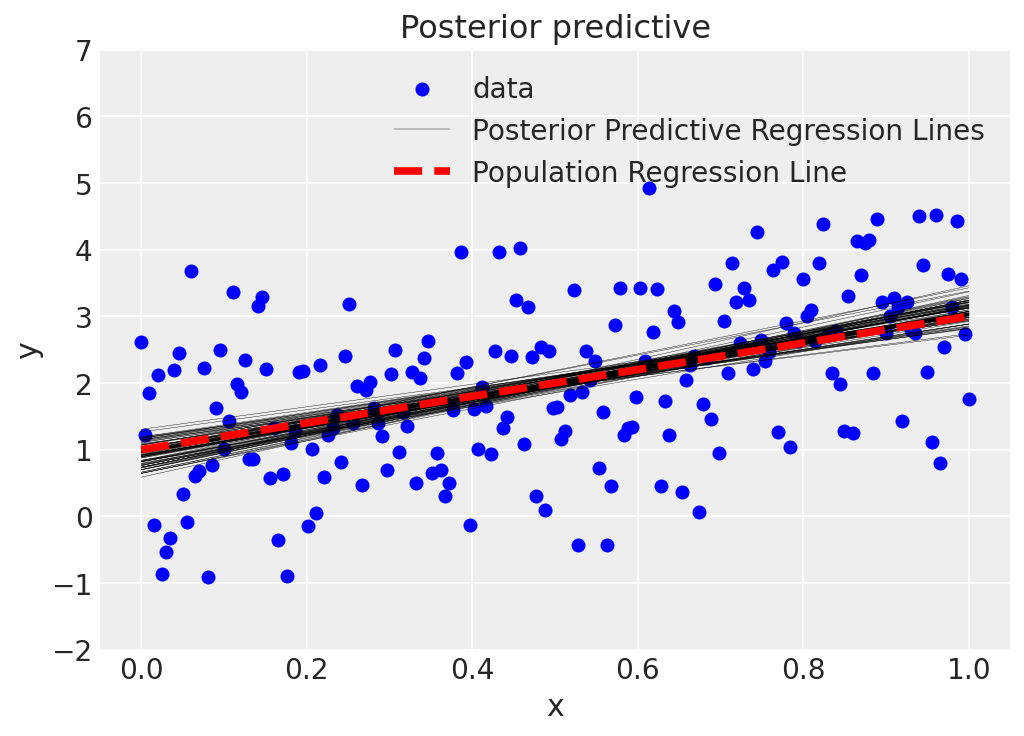

In [18]:
plt.figure(figsize = (7,5))

plt.scatter(x, y, c='blue', label='data')
pm.plot_posterior_predictive_glm(trace, samples=100, label="Posterior Predictive Regression Lines")
plt.plot(x, xb, label="Population Regression Line", lw=3.8, c="r", linestyle="dashed")

plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2,7)

plt.legend()

plt.show()

# OLS vs Bayesian Regression

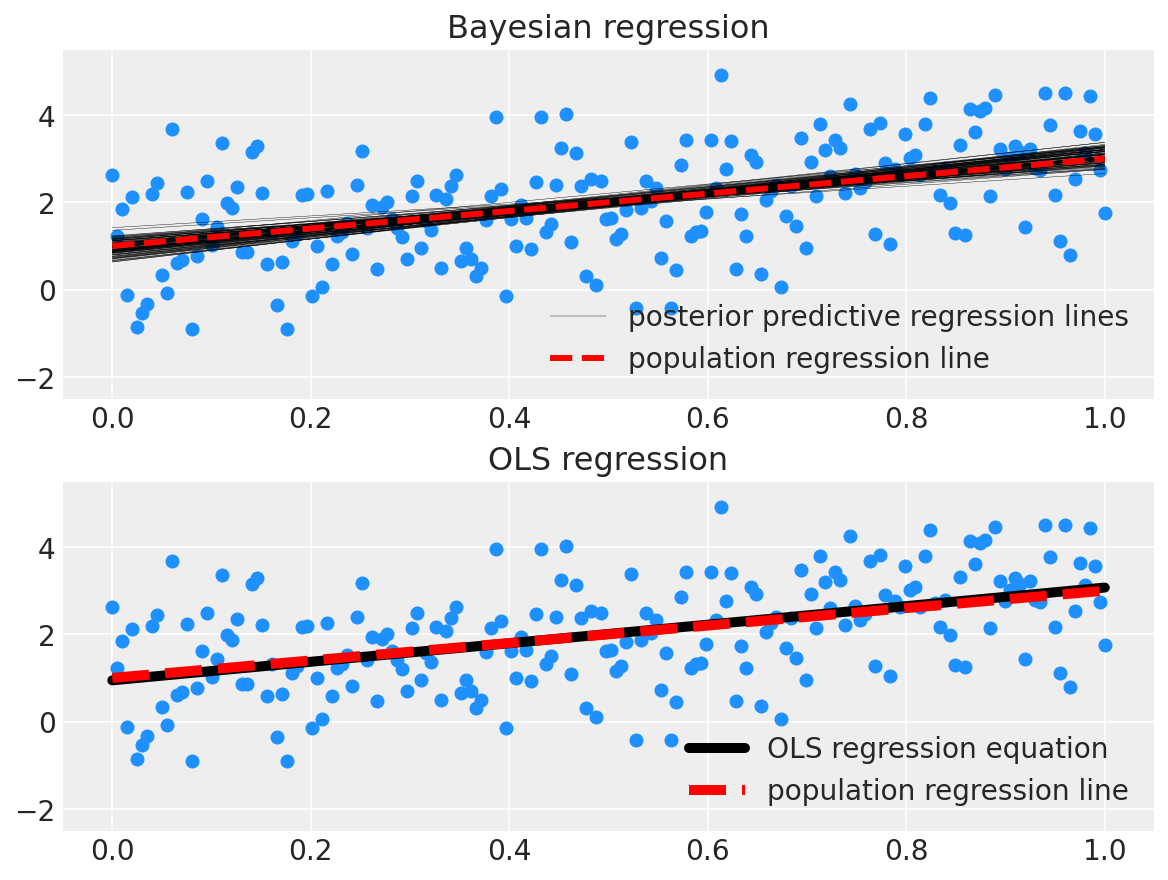

In [28]:

fig = plt.subplots(figsize=(8,6))

plt.subplot(2, 1, 1)
plt.scatter(x, y, c='dodgerblue')
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
plt.plot(x, xb, label="population regression line", lw=3.0, c="r", linestyle='dashed')
plt.title("Bayesian regression")
plt.ylim(-2.5,5.5)
plt.legend()


plt.subplot(2, 1, 2)
plt.scatter(x, y, c='dodgerblue')
plt.plot(X['x'], Y_pred, label='OLS regression equation', c='k', linewidth=5.0)
plt.plot(x, xb, label="population regression line", lw=5.0, c="r", linestyle='dashed')
plt.title("OLS regression")
plt.ylim(-2.5,5.5)
plt.legend()

plt.show()